In [72]:
# importando numpy 
import numpy as np # inicialize a semente para 25


import random

In [73]:
#importando bibliotecas

import numpy as np #trabalhar com numeros
import pandas as pd #manipulação de dados

import random #necessário para ultilizar o módulo
from random import randint
import seaborn as sns


import matplotlib.pyplot as plt

In [74]:
#lendo os dados
bd = pd.read_csv('sic-rotulado.csv')

#verificando as 5 primeiras linhas
bd.head()

,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,NeighborhoodConnectivity,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,Stress,TopologicalCoefficient,Role
0,7.284477,0.003115,0.137278,0.214286,24,14,False,3.000000,24,8,0.934537,421940,0.250000,1
1,7.285516,0.001038,0.137259,0.400000,16,14,False,4.000000,16,5,0.934526,210960,0.333333,1
2,6.289328,0.005531,0.159000,0.466667,12,13,False,7.833333,12,6,0.944903,773476,0.290123,2
3,5.621275,0.007808,0.177896,0.181818,30,13,False,8.750000,30,12,0.951862,1181032,0.128676,1
4,5.477131,0.000479,0.182577,0.523810,16,13,False,22.285714,16,7,0.953363,121978,0.327731,2


In [75]:
#y recebe apenas a coluna role
y = bd.iloc[:,13].values

In [76]:
#conta ocorrências da coluna Role por atributo
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{1: 492,
 2: 526,
 7: 58,
 8: 3,
 9: 1,
 1002: 5,
 1004: 1,
 1006: 1,
 1009: 3,
 1010: 11,
 1011: 2,
 1012: 1,
 1013: 1,
 1015: 1,
 1033: 1,
 1035: 2,
 1041: 4,
 1042: 1,
 1045: 2,
 1052: 2,
 1056: 1,
 1060: 1,
 1065: 1}

In [77]:
unique_df = pd.DataFrame(unique) 
counts_df = pd.DataFrame(counts)

In [78]:
#crio um novo Banco De Dados, neste seleciono os dados que somente apresentam na coluna ROLE os valores 1,2,7
#por serem os que mais se repetem
bd_mascara = bd['Role'].isin([1,2,7]) 
bd_filtrado = bd[bd_mascara]

In [79]:
bd_filtrado.head()

,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,NeighborhoodConnectivity,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,Stress,TopologicalCoefficient,Role
0,7.284477,0.003115,0.137278,0.214286,24,14,False,3.000000,24,8,0.934537,421940,0.250000,1
1,7.285516,0.001038,0.137259,0.400000,16,14,False,4.000000,16,5,0.934526,210960,0.333333,1
2,6.289328,0.005531,0.159000,0.466667,12,13,False,7.833333,12,6,0.944903,773476,0.290123,2
3,5.621275,0.007808,0.177896,0.181818,30,13,False,8.750000,30,12,0.951862,1181032,0.128676,1
4,5.477131,0.000479,0.182577,0.523810,16,13,False,22.285714,16,7,0.953363,121978,0.327731,2


In [80]:
role = [1, 2, 7]

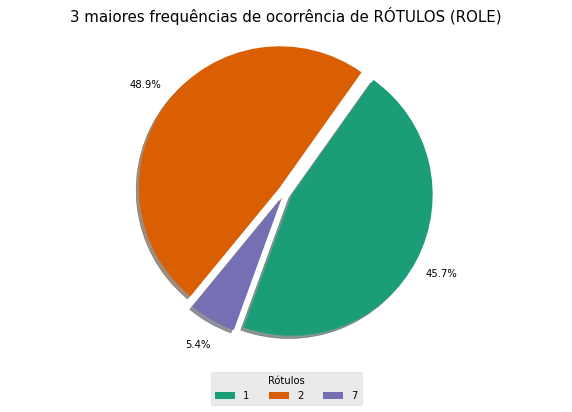

In [81]:
label = unique_df[0].head(3).value_counts().index 
fig1, ax1 = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal")) 
color = sns.color_palette('Dark2', 5) 
ax1.pie(counts_df[0].head(3), explode=(0.05, 0.05, 0.05), pctdistance=1.2,autopct='%1.1f%%', colors=color, shadow=True, startangle=250) 
ax1.axis('equal') 
ax1.set_title("3 maiores frequências de ocorrência de RÓTULOS (ROLE)", fontsize=15) 
plt.legend(title = "Rótulos", labels=label, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=5) 
plt.show() #gráfico de porcentagem

In [82]:
vetor = list(range(30))

for I in range(30):

    rand = []
    for v in range(1121):
        #baseado na quantidade de vezes que os rotulos aparecem na coluna role, defino em random.choice a probabilidade deles aparecerem de forma aleatoria
        group = int(np.random.choice(role, 1, p=[0.49, 0.46, 0.05]))
        rand.append(group)

    bd["Random"]=rand

    total_iguais = np.sum(bd['Role'] == bd['Random'])
    total = len(bd)
    acuracia = total_iguais / total
    
    vetor[I] = acuracia

In [83]:
print(f'Acuracia: {acuracia} ')

Acuracia: 0.4255129348795718 


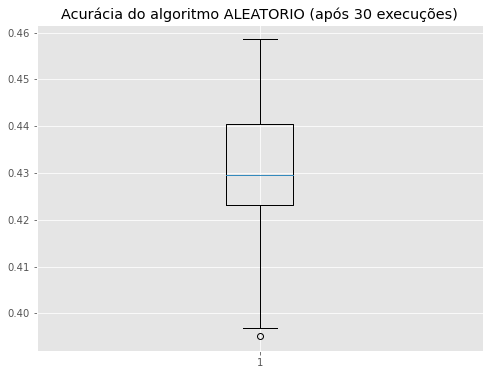

In [84]:
from importlib import reload
reload(plt) #recarregando configurações do plt (erro no gráfico)

plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.boxplot(vetor)
plt.title('Acurácia do algoritmo ALEATORIO (após 30 execuções)');

In [85]:
bd.head()

,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,NeighborhoodConnectivity,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,Stress,TopologicalCoefficient,Role,Random
0,7.284477,0.003115,0.137278,0.214286,24,14,False,3.000000,24,8,0.934537,421940,0.250000,1,1
1,7.285516,0.001038,0.137259,0.400000,16,14,False,4.000000,16,5,0.934526,210960,0.333333,1,2
2,6.289328,0.005531,0.159000,0.466667,12,13,False,7.833333,12,6,0.944903,773476,0.290123,2,1
3,5.621275,0.007808,0.177896,0.181818,30,13,False,8.750000,30,12,0.951862,1181032,0.128676,1,2
4,5.477131,0.000479,0.182577,0.523810,16,13,False,22.285714,16,7,0.953363,121978,0.327731,2,1


In [86]:
#x recebe apenas a coluna random
x = bd.iloc[:,14].values

In [87]:
x

array([1, 2, 1, ..., 2, 1, 1], dtype=int64)

In [99]:
#conta ocorrências da coluna Random por atributo
unique, counts = np.unique(x, return_counts=True)
dict(zip(unique, counts))

{1: 516, 2: 535, 7: 70}

In [100]:
unique_df = pd.DataFrame(unique) 
counts_df = pd.DataFrame(counts)

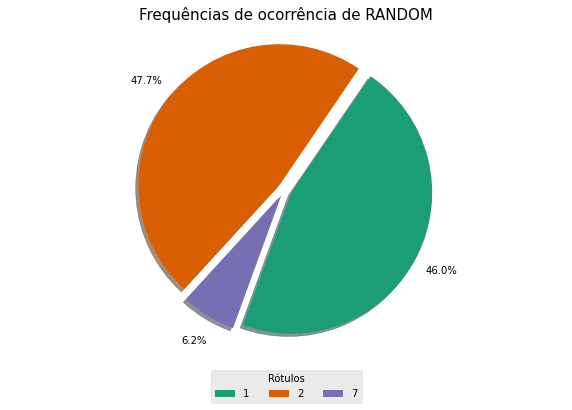

In [101]:
label = unique_df[0].head(3).value_counts().index 
fig1, ax1 = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal")) 
color = sns.color_palette('Dark2', 5) 
ax1.pie(counts_df[0].head(3), explode=(0.05, 0.05, 0.05), pctdistance=1.2,autopct='%1.1f%%', colors=color, shadow=True, startangle=250) 
ax1.axis('equal') 
ax1.set_title("Frequências de ocorrência de RANDOM", fontsize=15) 
plt.legend(title = "Rótulos", labels=label, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=5) 
plt.show() #gráfico de porcentagem

In [91]:
'''# inicializa a semente para 25 
random.seed(25) # configurando a sequência 
myseq = [ 
    "Towards", 
    "AI", 
    "is", 
    1, 
] # escolhendo aleatoriamente elementos da sequência com probabilidades definidas 
# A probabilidade para o o valor a ser 'Para' é definido como 0,1 
# A probabilidade de o valor ser 'AI' é definida como 0,6 
# A probabilidade de o valor ser 'é' é definida como 0,05 
# A probabilidade de o xccccr ser ser 1 é definido como 0,25
np.random.choice(myseq, 5, p=[0.1, 0.6, 0.05, 0.25])'''

'# inicializa a semente para 25 \nrandom.seed(25) # configurando a sequência \nmyseq = [ \n    "Towards", \n    "AI", \n    "is", \n    1, \n] # escolhendo aleatoriamente elementos da sequência com probabilidades definidas \n# A probabilidade para o o valor a ser \'Para\' é definido como 0,1 \n# A probabilidade de o valor ser \'AI\' é definida como 0,6 \n# A probabilidade de o valor ser \'é\' é definida como 0,05 \n# A probabilidade de o xccccr ser ser 1 é definido como 0,25\nnp.random.choice(myseq, 5, p=[0.1, 0.6, 0.05, 0.25])'

In [92]:
'''np.random.choice(role, 1, p=[0.49, 0.46, 0.05])'''

'np.random.choice(role, 1, p=[0.49, 0.46, 0.05])'